In [1]:
#sourced from https://github.com/giuseppebrb/sklearn-examples

In [2]:
# We want to classify iris flowers using sepal length, sepal width, petal length and petal width as features.
# We will create a classification model using SVM algorithm.

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [3]:
iris_dataset = datasets.load_iris()

classes = ['setosa', 'versicolor', 'virginica']

In [27]:
from IPython.display import Markdown, display

display(Markdown(iris_dataset.DESCR))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Creator: R.A. Fisher
:Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
:Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

|details-start|
**References**
|details-split|

- Fisher, R.A. "The use of multiple measurements in taxonomic problems"
  Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
  Mathematical Statistics" (John Wiley, NY, 1950).
- Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
  (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
- Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
  Structure and Classification Rule for Recognition in Partially Exposed
  Environments".  IEEE Transactions on Pattern Analysis and Machine
  Intelligence, Vol. PAMI-2, No. 1, 67-71.
- Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
  on Information Theory, May 1972, 431-433.
- See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
  conceptual clustering system finds 3 classes in the data.
- Many, many more ...

|details-end|


In [5]:
from IPython.display import Markdown, display

display(Markdown(iris_dataset.DESCR))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Creator: R.A. Fisher
:Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
:Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

|details-start|
**References**
|details-split|

- Fisher, R.A. "The use of multiple measurements in taxonomic problems"
  Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
  Mathematical Statistics" (John Wiley, NY, 1950).
- Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
  (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
- Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
  Structure and Classification Rule for Recognition in Partially Exposed
  Environments".  IEEE Transactions on Pattern Analysis and Machine
  Intelligence, Vol. PAMI-2, No. 1, 67-71.
- Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
  on Information Theory, May 1972, 431-433.
- See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
  conceptual clustering system finds 3 classes in the data.
- Many, many more ...

|details-end|


In [6]:
# from matplotlib import pyplot as plt

# plt.show(iris_dataset.target)

In [7]:
X = iris_dataset.data
y = iris_dataset.target

In [37]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model hyperparameter `C=0.00001`

In [9]:
model1 = svm.SVC(C=0.00001)

In [10]:
model1.fit(X_train, y_train)

SVC(C=1e-05)

In [11]:
predictions = model1.predict(X_test)

In [12]:
accuracy_score = metrics.accuracy_score(y_test, predictions)

In [13]:
print('accuracy score: ', accuracy_score)

accuracy score:  0.3


In [14]:
print('predictions: ', predictions)
print('actual: ', y_test)

predictions:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
actual:  [0 1 1 1 1 2 0 0 2 2 2 1 1 2 1 0 2 0 0 0 1 0 0 0 0 2 1 2 1 2]


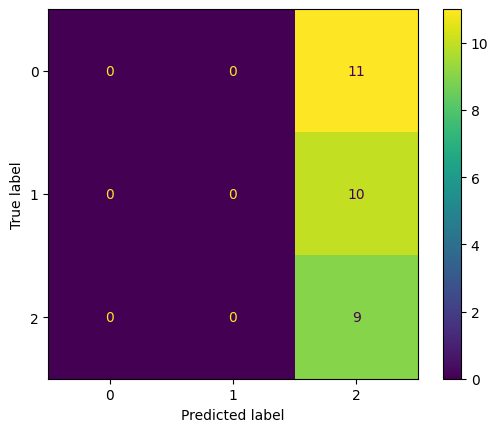

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model1.classes_)
disp.plot()
# plt.show()

### Model hyperparameter `C=0.9`

In [16]:
model2 = svm.SVC(C=0.9)

In [17]:
model2.fit(X_train, y_train)

SVC(C=0.9)

In [18]:
predictions = model2.predict(X_test)

In [19]:
accuracy_score = metrics.accuracy_score(y_test, predictions)

In [20]:
print('accuracy score: ', accuracy_score)

accuracy score:  0.9666666666666667


In [21]:
print('predictions: ', predictions)
print('actual: ', y_test)

predictions:  [0 1 1 1 1 2 0 0 2 2 2 1 1 2 1 0 2 0 0 0 1 0 0 0 0 2 1 2 2 2]
actual:  [0 1 1 1 1 2 0 0 2 2 2 1 1 2 1 0 2 0 0 0 1 0 0 0 0 2 1 2 1 2]


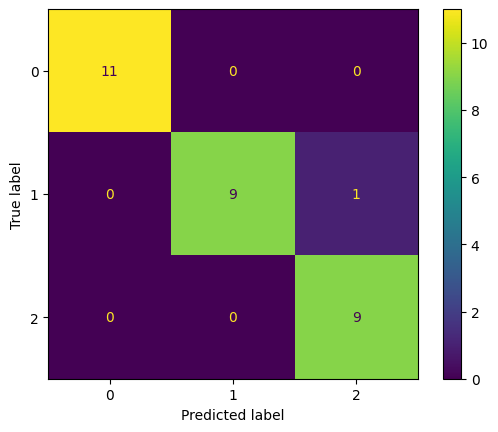

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model2.classes_)
disp.plot()
# plt.show()

### Classification metrics in machine learning

https://www.evidentlyai.com/classification-metrics

### Python object serialization

https://docs.python.org/3/library/pickle.html#module-pickle

In [32]:
import pickle

In [34]:
MODEL_FOLDER = "model"

#store the content
with open(f"{MODEL_FOLDER}/iris_mdl_v2.pkl", 'wb') as handle:
                    pickle.dump(model2, handle)

In [35]:
new_mdl = pickle.load(open(f"{MODEL_FOLDER}/iris_mdl_v2.pkl", "rb"))

In [41]:
new_mdl.predict([[1.3, 3.3, 2. , 2.5]])

array([0])